In [96]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
%pwd

'c:\\Users\\galib\\AI\\Projects\\TitanicMLProject\\notebooks'

In [69]:
train_data = pd.read_csv("../data/train.csv")

In [70]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [48]:
train_data = train_data.drop(labels=['PassengerId'],axis=1)

In [72]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [83]:

print(f"Age column % of NaN:{round((train_data.Age.isna().sum()/len(train_data.Age)),2)*100}")

Age column % of NaN:0.0


In [75]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Lets try imputation with median 

In [76]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())

In [77]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


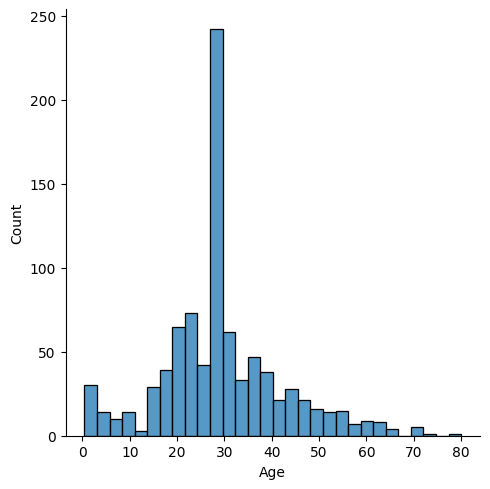

In [78]:
sns.displot(train_data,x='Age')

In [79]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [86]:
print(f"Cabin column % of NaN:{round((train_data.Cabin.isna().sum()/len(train_data.Cabin)),2)*100}%")

Cabin column % of NaN:77.0%


In [93]:
len(train_data.Cabin.unique())

148

Text(0, 0.5, 'Number of Cabin')

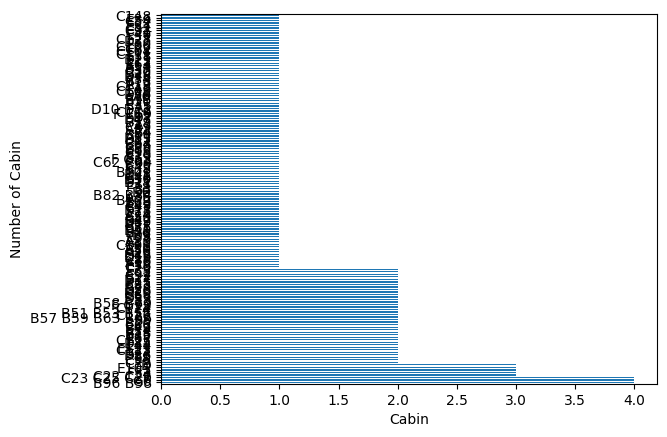

In [108]:
train_data['Cabin'].value_counts().plot(kind='barh')
plt.xlabel("Cabin")
plt.ylabel("Number of Cabin")

In [112]:
train_data['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

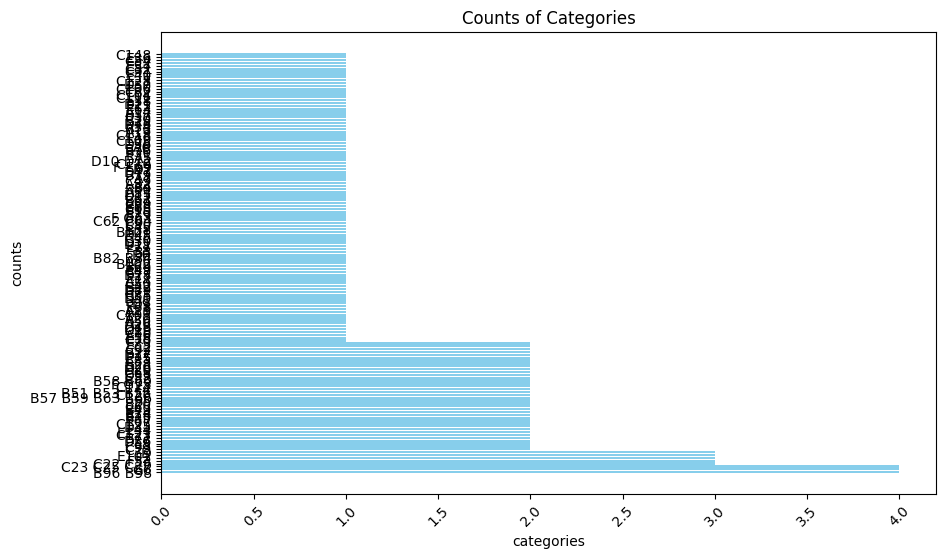

In [110]:
category_counts = train_data['Cabin'].value_counts()
plt.figure(figsize=(10,6))
plt.barh(category_counts.index,category_counts.values,color='skyblue')
plt.xlabel('categories')
plt.ylabel('counts')
plt.title('Counts of Categories')
plt.xticks(rotation=45)
plt.show()

In [113]:
train_data.Cabin.fillna('Missing',inplace=True)

In [114]:
train_data.Cabin.isna().sum()

0

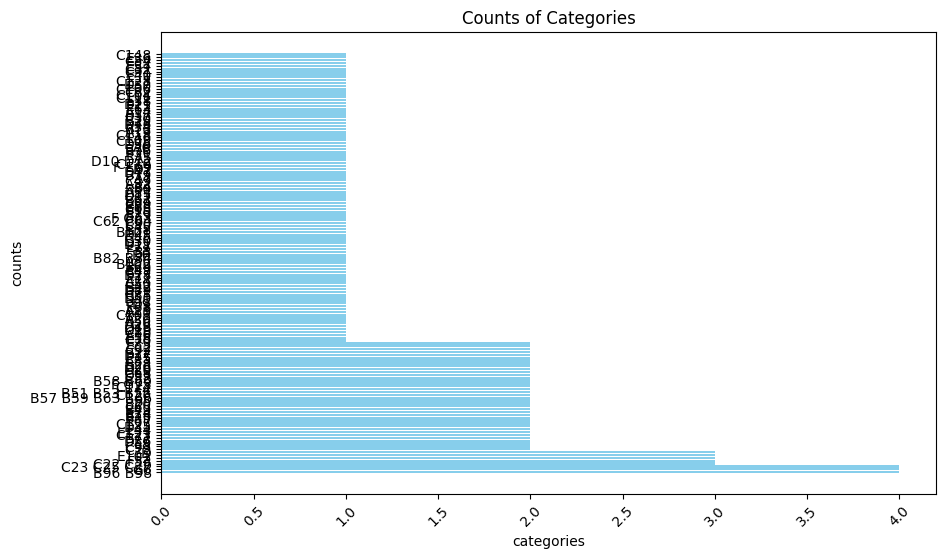

In [115]:
plt.figure(figsize=(10,6))
plt.barh(category_counts.index,category_counts.values,color='skyblue')
plt.xlabel('categories')
plt.ylabel('counts')
plt.title('Counts of Categories')
plt.xticks(rotation=45)
plt.show()

In [117]:
train_data.Cabin.mode()

0    Missing
Name: Cabin, dtype: object

In [118]:
train_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [121]:
train_data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [122]:
train_data.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [128]:
train_data.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [134]:
print(f"Embarked nan : {round((train_data.Embarked.isna().sum())/len(train_data.Embarked),3)*100}%")

Embarked nan : 0.2%


### Gender based survival insights

In [135]:
women = train_data.loc[train_data.Sex=='female']['Survived']

In [136]:
rate_women = (sum(women)/len(women))*100

In [137]:
print(f"% of women who survived : {round(rate_women,3)}% \nlength :{len(women)} \nSum :{sum(women)}")

% of women who survived : 74.204% 
length :314 
Sum :233


In [138]:
men = train_data.loc[train_data.Sex=='male']['Survived']
men_rate = (sum(men)/len(men))*100
print(f"% of men who survived : {round(men_rate,3)}% \nlength :{len(men)} \nSum :{sum(men)}")

% of men who survived : 18.891% 
length :577 
Sum :109


In [139]:
print(f"Total population : {((len(women)/len(train_data))+(len(men)/len(train_data)))*100}% \nWomen population :{round((len(women)/len(train_data)),2)*100}% \nMen population :{round((len(men)/len(train_data)),2)*100}%")

Total population : 100.0% 
Women population :35.0% 
Men population :65.0%


In [140]:
print(f"female death percentage: {round((len(women)-sum(women))/len(women),2)*100}% \nmale death percenatge: {round((len(men)-sum(men))/len(men),2)*100}%")

female death percentage: 26.0% 
male death percenatge: 81.0%


Total population length :891 <br>
women length :314 <br>
men length :577 <br>

Women population from total population :35%<br>
% of women who survived : 74% <br>
% of women who Deceased : 26% <br>

Men population from Total population :65% <br>
% of men who survived : 19% <br>
% of men who Deceased : 81%